# Output variable -> y
# y -> Whether the client has subscribed a term deposit or not
# Binomial ("yes" or "no")

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
app_log = pd.read_csv("E:\\bank-full.csv",sep=';')


In [3]:
app_log.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
app_log.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# select columns
columns = ['age', 'balance', 'duration', 'campaign', 'y']
app_log_sel = app_log[columns]
app_log_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

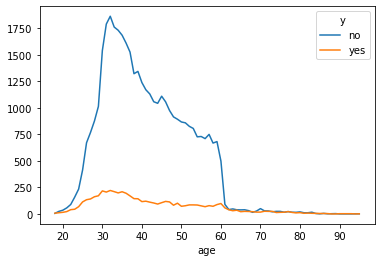

In [7]:
pd.crosstab(app_log_sel.age,app_log_sel.y).plot(kind="line")

# graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody.

<AxesSubplot:>

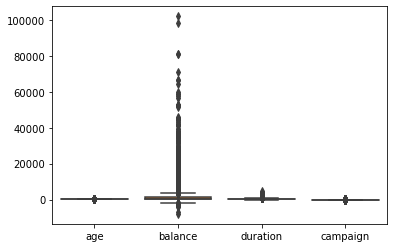

In [9]:
sb.boxplot(data =app_log_sel,orient = "v")

In [10]:
app_log_sel['outcome'] = app_log_sel.y.map({'no':0, 'yes':1})
app_log_sel.tail(10)

C:\Users\admin\AppData\Local\Temp/ipykernel_5260/1444202708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_log_sel['outcome'] = app_log_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

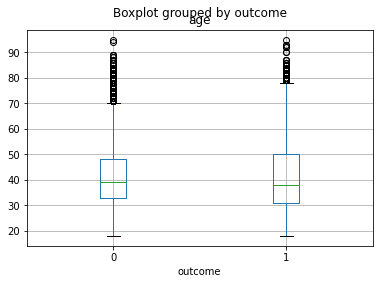

In [11]:
app_log_sel.boxplot(column='age', by='outcome')


# probably not a great feature since lot of outliers

In [12]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = app_log_sel[feature_col]
Y = app_log_sel[output_target]


In [13]:
classifier = LogisticRegression()


In [14]:
classifier.fit(X,Y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [15]:
classifier.coef_ # coefficients of features


array([[ 7.69721820e-03,  3.72191058e-05,  3.54908906e-03,
        -1.39828317e-01]])

In [15]:
classifier.predict_proba (X) # Probability values


array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553761, 0.69446239],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [16]:
y_pred = classifier.predict(X)


In [17]:
y_pred


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix = confusion_matrix(Y,y_pred)


In [20]:
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'Predicted Label')

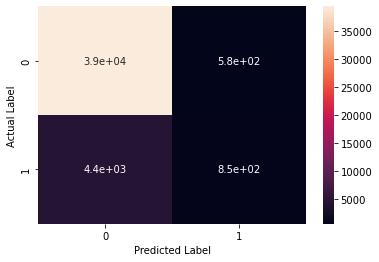

In [22]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Text(0, 0.5, 'True Positive Rate')

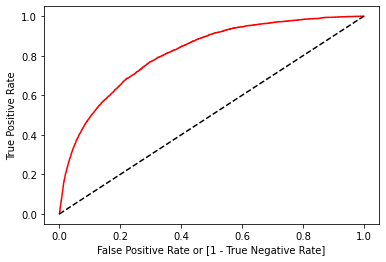

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [24]:
auc

0.5734694329116669